# Feature descriptors
In this lecture, we will look at what image features are

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
im = cv2.imread(os.path.relpath('../../Data/BuildingBlocks.png'))
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [7]:
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

# Applying the function 
fast = cv2.FastFeatureDetector_create() 
fast.setNonmaxSuppression(False) 
  
  
# Drawing the keypoints 
kp = fast.detect(gray_image, None) 
im_FAST = cv2.drawKeypoints(im, kp, None, color=(0, 255, 0)) 

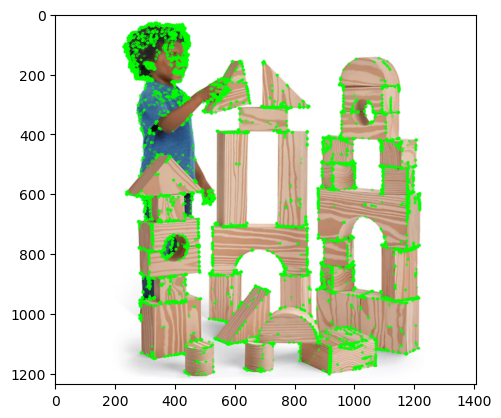

In [8]:
plt.imshow(im_FAST)

## How to use features to align images

Text(0.5, 1.0, 'Rotated')

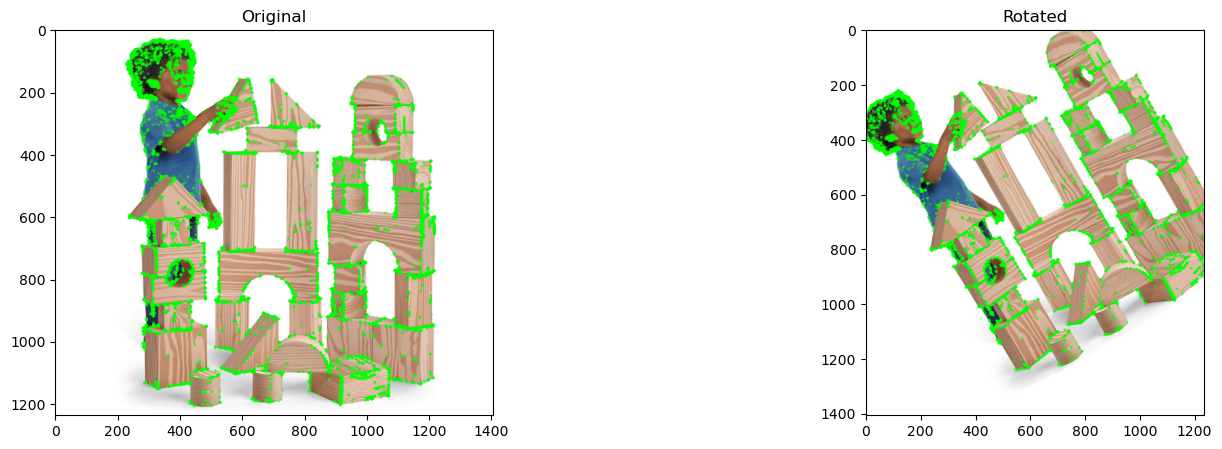

In [22]:
# Let's make a rotated copy of the image to use to demonstrate alignment


num_rows, num_cols = im.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
im_rot = cv2.warpAffine(im, rotation_matrix, (num_cols, num_rows))

gray_image_rot = cv2.cvtColor(im_rot, cv2.COLOR_RGB2GRAY) 

# Applying the function 
fast = cv2.FastFeatureDetector_create() 
fast.setNonmaxSuppression(False) 
  
# Drawing the keypoints 
kp_rot = fast.detect(gray_image_rot, None) 
im_FAST_rot = cv2.drawKeypoints(im_rot, kp_rot, None, color=(0, 255, 0)) 

plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(im_FAST);  plt.title("Original")
plt.subplot(122);plt.imshow(im_FAST_rot);  plt.title("Rotated")

In [26]:
orb = cv2.ORB_create(50)

keypoints,descriptor = orb.detectAndCompute(im, None) 
keypoints_rot,descriptor_rot = orb.detectAndCompute(im_rot, None) 



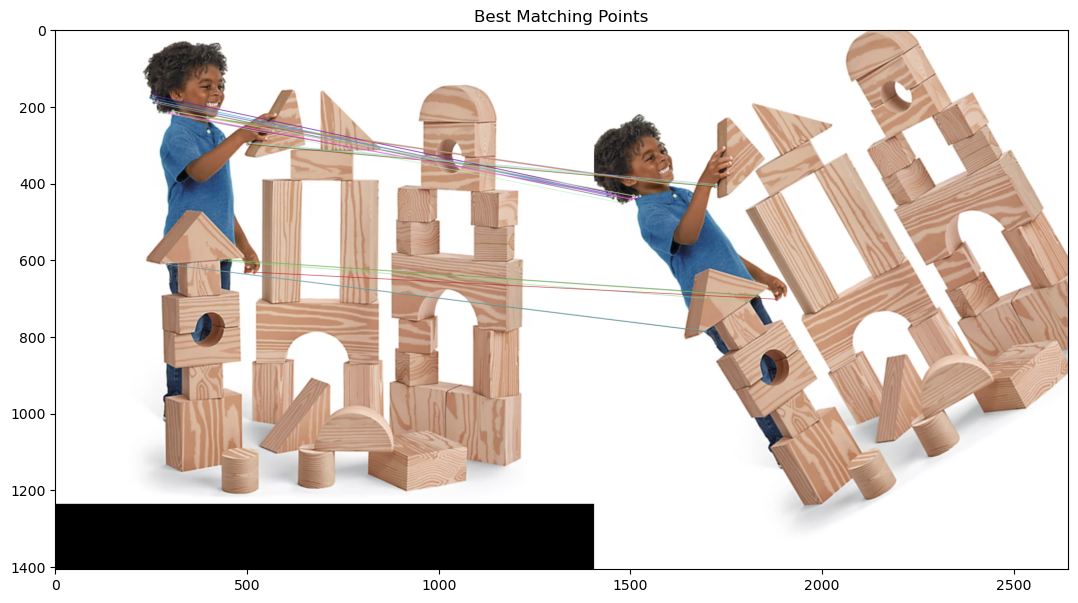


Number of Matching Keypoints Between The Training and Query Images:  34


In [27]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(descriptor, descriptor_rot)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(im, keypoints, im_rot, keypoints_rot, matches, im_rot, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)


In [29]:
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)

# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(matches)):
  p1[i, :] = keypoints[matches[i].queryIdx].pt
  p2[i, :] = keypoints_rot[matches[i].trainIdx].pt

# Find the homography matrix.
# This is the rotation operator to go from P1 to P2
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(im,homography, (im_rot.shape[0],im_rot.shape[1]))

Text(0.5, 1.0, 'Original interest aligned')

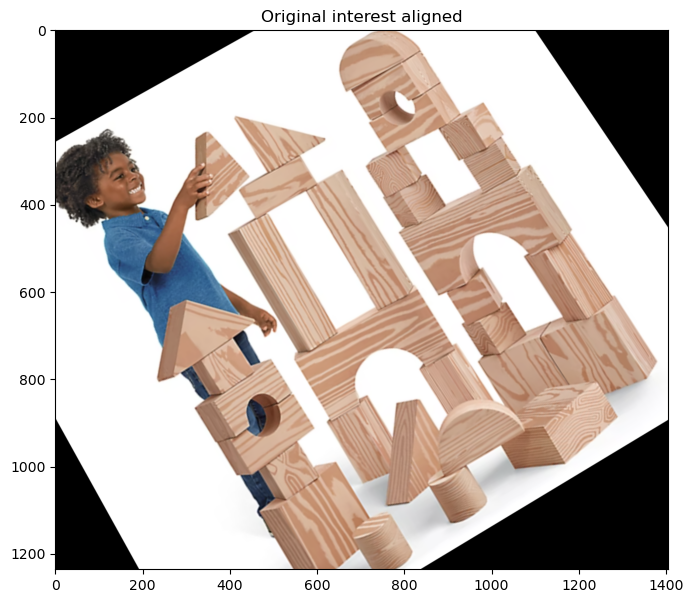

In [31]:
plt.imshow(transformed_img); plt.title("Original interest aligned")